# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Основная задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


**Объект исcледования** 

Путь к файлу: `/datasets/real_estate_data.csv`

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 



**Цель исследования**

Научиться определять рыночную стоимость объектов недвижимости.

**Сформулируем задачи, которые предполагается решить для достижения цели исследования**

- Изучить время продажи квартиры
- Определить, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. 
- Изучить зависимость от даты размещения: дня недели, месяца и года.
- Определить 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. 
- Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
- Выяснить, какая область входит в центр Санкт-петербурга.Опредлить как цена зависит от удалённости от центра.
- Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков.
- Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)
- Сравнить результаты для квартир в центре с общими результатами

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общее-исследование" data-toc-modified-id="Общее-исследование-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общее исследование</a></span></li><li><span><a href="#Исследование-для-квартир-в-центре" data-toc-modified-id="Исследование-для-квартир-в-центре-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследование для квартир в центре</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

Импортируем `pandas`

In [2]:
import pandas as pd

Прочитаем файл `/datasets/real_estate_data.csv`

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Файл прочитался. Выведем на экран первые 5  строк файла.

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Согласно исходным данным, в стобцах содержится следующая информация:

`total_images` — число фотографий квартиры в объявлении

`last_price` — цена на момент снятия с публикации

`total_area` — площадь квартиры в квадратных метрах (м²)

`first_day_exposition` — дата публикации

`rooms` — число комнат

`ceiling_height` — высота потолков (м)

`floors_total` — всего этажей в доме

`living_area` — жилая площадь в квадратных метрах (м²)

`floor` — этаж

`is_apartment` — апартаменты (булев тип)

`studio` — квартира-студия (булев тип)

`open_plan` — свободная планировка (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`balcony` — число балконов

`locality_name` — название населённого пункта

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`cityCenters_nearest` — расстояние до центра города (м)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)


Видно, что в столбцах встречаются пропуски. Название `cityCenters_nearest` лучше переименовать в `city_centers_nearest`. С этим будем работать на этапе предобработки данных. 
Выведем информацию о таблице.

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Количество строк (записей) - 23699. Пригодится для проверки сумм при обработке данных. Пропусков достаточно много в разных колонках. Данные в колонке `first_day_exposition` указаны как `object`, но удобнее будет работать с `datetime`. 

### Вывод

Файл прочитался без ошибок и названия столбцов соответствуют описанию. В таблице присутствуют пропуски. Особенно критично наличие пропусков в столбце с названием населённого пункта и расстоянием до центра. Неплохо бы изменить название столбца с расстоянием до центра города и выполнить преобразование типов в колонках для удобства работы. Этим займёмся на этапе предобработки данных.

## Предобработка данных

Для начала переименуем столбец `cityCenters_nearest` в `city_centers_nearest`. Для этого запросим

In [6]:
df = df.rename({'cityCenters_nearest':'city_centers_nearest'}, axis=1)

Получим список столбцов и проверим

In [7]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Теперь займёмся непосредственно предобработкой. Данные в колонке `first_day_exposition` указаны как `object`, но удобнее будет работать с `datetime`. Пропусков в колонке нет.

In [8]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим, что получилось.

In [9]:
df['first_day_exposition'].sort_values()

10132   2014-11-27
8393    2014-11-27
15857   2014-11-27
2831    2014-11-27
696     2014-11-27
           ...    
10917   2019-05-03
5986    2019-05-03
9217    2019-05-03
21887   2019-05-03
15072   2019-05-03
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

Столбец с временем размещения выглядит правдоподобно с 2014 по 2019 годы. Что касается времени, то проверим столбец `days_exposition`, в котором встрtчаются пропуски.

In [10]:
df['days_exposition'].value_counts(dropna=False).sort_values()

773.0        1
681.0        1
699.0        1
1006.0       1
1497.0       1
          ... 
30.0       208
7.0        234
60.0       538
45.0       880
NaN       3181
Name: days_exposition, Length: 1142, dtype: int64

Из записи выше видно, что отсутствуют объявления, у которых время от выставления до продажи 0 дней. Т.е. не прошло и суток с выставления до продажи. Так отсутствует доступ к логике работы объявлений, то можем предполагать следующее. 
Либо 0 заменили NaN при расчёте параметра, либо квартира так и не была куплена и продолжала быть в активном объявлении. Либо была куплена, но объявление не сняли.

Для начала предположим, что эти квартиры покупались быстро, значит логично ожидать, что стоимость таких квартир в основной своей массе должна быть ниже средней по рынку. Для этого добавим показатель `price_per_area`, который показывает стоимость за м.кв. общей площади квартиры

In [11]:
df['price_per_area']=df['last_price']/df['total_area']

Если квартиры продались очень быстро, то их показатель стоимости за м.кв. ожидается ниже, чем средние показатели для квартир, которые продали за 5 дней. Сравним основные показатели для квартир с пропусками в `days_exposition` и без пропусков.

In [12]:
df[df['days_exposition'].isna()]['price_per_area'].describe()-df[df['days_exposition']<=5]['price_per_area'].describe()

count    2.691000e+03
mean     8.300213e+03
std      2.182371e+04
min     -6.002040e+03
25%     -1.888500e+03
50%      7.083289e+03
75%      1.596418e+04
max      1.079860e+06
Name: price_per_area, dtype: float64

Положительные показатели указывают на то, что цена за метр в строках с пропущенным к-вом дней несколько завышена. Дополнительно проверим распределение продаж квартир по дням. Для примера рассмотрим, как квартиры продавались в течение года

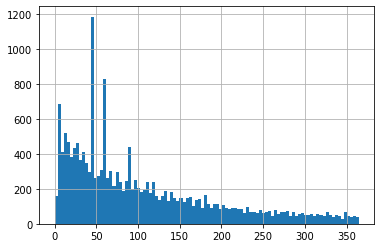

In [13]:
df['days_exposition'].hist(bins=100, range=(0,365))

Видим, что есть несколько значений, которые выбиваются из общей картины. 
Но если бы большое к-во квартир продалось за время, равное 0 дням, то общая картина испортилась ещё хуже.
Поэтому логично предполагаем, что обявления с пропусками в `days_exposition` были активными на момент выгрузки данных. Это могут быть как свежие объявления, так и старые объявления у которых завышены цены. Заменим такие значения на медиану. При проведении аналитики далее, учтём эту замену.

In [14]:
df.loc[df['days_exposition'].isna(), 'days_exposition'] = df['days_exposition'].median()

Теперь займёмся данными ,которые получили автоматически из картографических сервисов - расстояния и к-во прудов и парков.

Посмотрим, какое количество водоёмов у квартир, у которых пропуски в стобце `ponds_nearest` - расстояние до водоёма.

In [15]:
df[df['ponds_nearest'].isna()]['ponds_around3000'].value_counts(dropna=False)

0.0    9071
NaN    5518
Name: ponds_around3000, dtype: int64

Видим, что если есть пропуск в столбце `ponds_nearest`, то имеем либо пропуск либо 0 в солбце с к-вом водоёмов. Логично заменить пропуски на 0. Если расстояние до парка превышает 3000м, значит вдоёмов поблизости нет. Пропуски судя по всему обусловлены работой сайта с объявлениями.

In [16]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Для того, чтобы заменить пропуски в столбце с расстоянием до водоёма, посмотрим информацию о столбце

In [17]:
df['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Максимальное расстояние не превышает 1344м. Значит заменим пропуски числом 3000. И будем учитывать как 3000 и более метров до водоёма. 

In [18]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(3000)

Аналогично поступаем с парками. Посмотрим, какое количество парков у квартир, у которых пропуски в стобце `parks_nearest` - расстояние до парка.

In [19]:
df[df['parks_nearest'].isna()]['parks_around3000'].value_counts(dropna=False)

0.0    10102
NaN     5518
Name: parks_around3000, dtype: int64

Аналогичными рассуждениями с водоёмами заменям пропуски прудов нулями

In [20]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [21]:
df[df['parks_nearest'].isna()]['parks_around3000'].value_counts(dropna=False)

0.0    15620
Name: parks_around3000, dtype: int64

Просмотрим информацию о расстоянии до парка

In [22]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Интересно, что есть расстояния больше 3000м. Посмотрим, сколько их и сколько там указано парков.

In [23]:
df[df['parks_nearest']>3000]['parks_around3000'].value_counts()

0.0    4
Name: parks_around3000, dtype: int64

4 записи в которых 0 парков. Записей не много. Тогда пропуски с расстоянием до парка заполним расстоянием 3200м, а при анализе эти 4 попадут в группу (более 3000м до парка).

In [24]:
df['parks_nearest'] = df['parks_nearest'].fillna(3200)

Далее разберёмся с пропусками в солбце с балконами. Посмотрим, какие значения принимает параметр.

In [25]:
df['balcony'].value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Получается, что квартир, где 1 балкон больше, квартир без балкона. Судя по всему поле балкон оставили незаполненным при отсутствии балкона. Заполним пропуск

In [26]:
df['balcony'] = df['balcony'].fillna(0)

Заполним пропуск в столбце `is_apartment`. Посмотрим, какие значения принмает параметр.

In [27]:
df['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Судя по всему в поле опять не выбрано значение. Вероятно, что по умолчанию значение должно быть `False`

In [28]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [29]:
df['ceiling_height'].value_counts(dropna=False).tail()

26.00    1
3.88     1
3.29     1
3.83     1
3.58     1
Name: ceiling_height, dtype: int64

Посмотрим какие занчения принимает высота потолков

In [30]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Есть странные значения - 1 м. Думаю следует заменить высоту потолков медианным занчением, если она ниже 2 метров.
Также есть очень большие значения - 14 и более метров. Судя по всему какая-то ошибка. Значения 20, 22.6 и так далее скорее всего ошиблись в записи на разряд. Заменим эти значения следующим образом. Для начала все значения, где высота более 20 метров поделим  на 10. 

In [31]:
df.loc[df['ceiling_height']>=20, 'ceiling_height'] = df['ceiling_height']/10

Потом все значения, что меньше 2 метров и больше 10 заменим медианным значением. 

In [32]:
df.loc[(df['ceiling_height']>=10) | (df['ceiling_height']<2) , 'ceiling_height'] = df['ceiling_height'].median()

In [33]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Проверяем результат

In [34]:
df['ceiling_height'].sort_values().unique()

array([2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48,
       2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59,
       2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 ,
       2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81,
       2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92,
       2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03,
       3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14,
       3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26,
       3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37,
       3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49,
       3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 ,
       3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78,
       3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95,
       3.98, 4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.

Всё вышло. Теперь посмотрим значения в столбце с высотами этажей.

In [35]:
df['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

Бывают здания и высотой в 60 этажей. Здесь скорее всего придётся заменить количество этажей значением, которое будет явно выбиваться. Например -1. Это даст возможно исключить эти значения при аналитических расчётах.

In [36]:
df['floors_total'] = df['floors_total'].fillna(-1)

Посмотрим на значения в графе жилая площадь. 

In [37]:
df['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

Значения разняться от 2 до 409.7. И есть пропуски. Допускаем, что такие площади могут быть. Столбец для нас не самый критичный. Какие-то данные мы сожем из него получит. Пропуски заменим на -1. Это также даст возможно исключить эти значения при аналитических расчётах, которые связаны с жилой площадью.

In [38]:
df['living_area'] = df['living_area'].fillna(-1)

Посмотрим на значения в графе площадь кухни.

In [39]:
df['kitchen_area'].sort_values().unique()

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

Значения разняться от 1,3 до 112. И есть пропуски. Аналогично. Пропуски заменим на -1. Это также даст возможно исключить эти значения при аналитических расчётах, которые связаны с площадью кухни.

In [40]:
df['kitchen_area'] = df['kitchen_area'].fillna(-1)

Посмотрим, есть ли записи у которых площадь кухни больше жилой.

In [41]:
df.query('kitchen_area>living_area')['kitchen_area'].count()

794

Странно, есть такие значения. Но оставим как есть. Может в этом есть какой-то смысл.

Посмотрим на столбец с названием населённого пункта

In [42]:
len(df['locality_name'].unique())

365

Значений достаточно много. Посмотрим, сколько пропусков.

In [43]:
df['locality_name'].isna().sum()

49

Пропусков не много, и теоретически названия некоторых н.п. можно было восстановить по расстоянию до центра, но так как не понятно в какой стороне и знаяений не много, то проще всего их заменить на значения `Неизвестный н.п.`

In [44]:
df['locality_name'] = df['locality_name'].fillna('Неизвестный н.п.')

Посмотрим, на значения, которые имеют населённый пункты.

In [45]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Неизвестный н.п.',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
    

Видим, что некоторые значение имеют неявное дублирование. Например `посёлок Мурино` и `поселок Мурино`. Логично от этого избавиться. Уберём все лишние слова, оставим только названия. Список слов, которые будем удалять:

In [46]:
words=(
    ['поселок ', 'посёлок ', 'деревня ', 'село ', 'садовое товарищество ',
     'поселок городского типа ', 'городской поселок ', 'городской ', 'Станции ', 
     'садоводческое некоммерческое товарищество ','при железнодорожной станции ',
     'коттеджный поселок ', 'Пансионат ', 'Форт ', 'городского типа ', 'коттеджный ', 'станции '  ]
)

Функция, которая будет удалять:

In [47]:
def del_word(element):
    element=str(element)
    for word in words:
        if word in element:
            element=element.replace(word,'')
    return element

Применим функцию к столбцу с названиями населённых пунктов

In [48]:
df['locality_name']=df['locality_name'].apply(del_word)

Посмотрим, как изменился список населённых пунктов

In [49]:
len(df['locality_name'].unique())

306

Значений стало меньше. Посмотрим на значения

In [50]:
df['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зелёный Бор', 'Зимитицы', 'Иванг

Уже лучше. Неявные дубликаты были удалены. Теперь посмотрим, какой населённый пункт стоит у записей, у которых не указано расстояние до центра. 

In [51]:
df[df['city_centers_nearest'].isna()]['locality_name'].value_counts(dropna=False)

Мурино        588
Кудрово       472
Всеволожск    398
Гатчина       307
Выборг        237
             ... 
Пикколово       1
Ялгино          1
Кирпичное       1
Нижняя          1
Хапо-Ое         1
Name: locality_name, Length: 288, dtype: int64

Фактически можно скруппировать по населёным рунктам и пропуски заполнить средними значениями для населённых пунктов

In [52]:
mean_distance=df.groupby('locality_name')['city_centers_nearest'].mean().sort_values()

In [53]:
mean_distance

locality_name
Неизвестный н.п.    11278.902439
Санкт-Петербург     11601.291571
Парголово           19924.776758
Мурино              21888.000000
Стрельна            23376.113636
                        ...     
Яльгелево                    NaN
Ям-Тесово                    NaN
Янино-1                      NaN
имени Морозова               NaN
имени Свердлова              NaN
Name: city_centers_nearest, Length: 306, dtype: float64

Проверим количество пропусков.

In [54]:
df['city_centers_nearest'].isna().sum()

5519

Неоторые значения так и остануться пустыми, но некотрые сможем заполнить. Напишем цикл, который сможет заполнить пропуcки средними значениями по населённому пункту.

In [55]:
for i in mean_distance.index:
    df.loc[(df['city_centers_nearest'].isna()==True) & (df['locality_name']==i), 'city_centers_nearest']=mean_distance[i]

In [56]:
df['city_centers_nearest'].isna().sum()

4829

Посмотрим, какие н.п. остались

In [57]:
df[df['city_centers_nearest'].isna()]['locality_name'].value_counts().head(10)

Кудрово            472
Всеволожск         398
Гатчина            307
Выборг             237
Новое Девяткино    144
Сертолово          142
Кириши             125
Бугры              114
Сланцы             112
Волхов             111
Name: locality_name, dtype: int64

Количество пропусков уменьшилось. Для остальных пропусков можем поискать населённые пункты на карте и записать значения, либо пометить их -1. Проще всего заполнить -1, но столбец важный и поэтому заполним хотя бы первые 3 строки. Расстояния до Кудрова, Всеволожса и Гатчины принмаем 21000, 23000, и 42000м. Для остальных заполним -1.

In [58]:
dict1={'Кудрово':21000, 'Всеволожск':23000, 'Гатчина':42000}

In [59]:
for i in dict1.keys():
    df.loc[(df['city_centers_nearest'].isna()==True) & (df['locality_name']==i), 'city_centers_nearest']=dict1[i]

Уже лучше. Остальные пока заменим -1.

In [60]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(-1)

С расстоянием до аэропорта поступим проще. Так как не планируем использовать колонку в дальнейшем анализе, то заменим пропуски сразу на -1, хоть и могли поступить аналогично с расстоянием до центра.

In [61]:
df['airports_nearest'] = df['airports_nearest'].fillna(-1)

С пропусками разобрались. Посмотрим, что вышло.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_a

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_a

Пропуски отсутсвуют. Проверим дубликаты, на всякий случай.

In [64]:
df.duplicated().sum()

0

Дубликатов нет. Тем проще.

### Вывод

В ходе предобработки данных изаменили тим данных в столбце с датой первого размещения. 
- Пропуски в столбце `days_exposition` заменили медианными занчениями. 
- Пропуске в графе с населённым пунктом заполнили как `Неизвестный н.п.`. 
- Пропуске в стобцах `ponds_around3000`, `parks_around3000`,`balcony` заменили на 0. 
- Пропуски для парков записали как 3200, для прудов -3000. 
- Пропущенные расстояния до аэропорта пометили как -1. 
- Пропуски в `ceiling_height` заполнили медианными значениями. 
- Пропущенные значения в графе `is_apartment` заменили на False.
- Пропуски в `balcony` записали как 0.
- Пропуски в `kitchen_area`, `living_area` и `floors_total` заменили на -1.
- Названия населённых пунктов привели к однообразию.
- Пропуски в расстоянии до населённых пунктов взяли по среднему для населённых пунктов. Для некоторых задали вручную на основании расстояний по карте. Остальные записали как -1.
- Добавили колонку с ценой квадратного метра.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_a

## Расчёты и добавление результатов в таблицу

Согласно заданию, следует добавить в таблицу стоимость квадратного метра (что уже сделали), а также день недели, месяц и год публикации объявления. Это сделаем с помощью колонки `first_day_exposition`. Добавим день

In [66]:
df['week_day'] = pd.DatetimeIndex(df['first_day_exposition']).day_name()

Добавим месяц.

In [67]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month_name()

Добавим год.

In [68]:
df['year'] = df['first_day_exposition'].dt.year

Посмотрим, что получилось

In [69]:
df[['year', 'month', 'week_day']].head(5)

,year,month,week_day
0,2019,March,Thursday
1,2018,December,Tuesday
2,2015,August,Thursday
3,2015,July,Friday
4,2018,June,Tuesday


Теперь посчитаем и добавим в таблицу: этаж квартиры; варианты — `первый`, `последний`, `другой`. Значения для записей, у которых не было указано, сколько всего этажей (если это не первый этаж) запишем с параметром `другой`. Для начала запишем в колонку `res_floor` отношение этажа ко всем этажам в здании

In [70]:
df['res_floor'] = df['floor']/df['floors_total']

Если отношение единица, то тогда этаж последний

In [71]:
df['res_floor'] = df['res_floor'].apply(lambda x: 'последний' if x == 1 else 'другой')

Ecли этаж первый, то запишем в `res_floor` значение *первый*

In [72]:
df.loc[df['floor']==1,'res_floor'] = 'первый'

Посмотрим результат

In [73]:
df['res_floor'].value_counts()

другой       17446
последний     3336
первый        2917
Name: res_floor, dtype: int64

Теперь требуется определить соотношение жилой и общей площади.

In [74]:
df['living_per_total'] = df['living_area']/df['total_area']

В столбце могут возникнуть отрицательные значения - это результат того, что не во всех записях была указана жилая площадь. Аналогично определим соотношение площади кухни к общей.

In [75]:
df['kitchen_per_total'] = df['kitchen_area']/df['total_area']

Выведем первый строки добавленных столбцов.

In [76]:
df[['res_floor', 'living_per_total', 'kitchen_per_total']].head()

,res_floor,living_per_total,kitchen_per_total
0,другой,0.472222,0.231481
1,первый,0.460396,0.272277
2,другой,0.612500,0.148214
3,другой,-0.006289,-0.006289
4,другой,0.320000,0.410000


### Вывод

Вычислили и добавили в таблицу следующие данные:
- Год публикации объявления
- День недели публикации объявления
- Месяц публикации объявления
- Этажность (*первый, последний, другой*)
- Соотношение жилой площади к общей
- Соотношение площади кухни к общей

## Исследовательский анализ данных

### Общее исследование

Построим и исследуем гистограммы распределения квартир по площади, цене за квадратный метр, к-ву комнат, высоте потолков и к-ву дней продажи. Для этого создадим словарь по требуемым гистограммам, в которых ключ-параметр, значение - подпись графика

In [210]:
hists={'total_area':'Распределение количества квартир в зависимости от общей площади',
      'price_per_area':'Распределение количества квартир в зависимости от стоимоcти метра',
      'rooms':'Распределение количества квартир в зависимости от количества комнат',
       'ceiling_height':'Распределение количества квартир в зависимости от высоты потолков',
       'days_exposition': 'Распределение количества квартир в зависимости от длительности продажи'
      }

Импортируем библиотеку `matplotlib.pyplot`

In [229]:
import matplotlib.pyplot as plt

Создадим функцию-генератор, которая последовательно будет выводить гистограммы

In [381]:
def drow_hist(df,hists):
    for key,title in hists.items():
        hist=df[key].hist(bins=50, figsize=(12,4))
        hist.set_xlabel(key)
        hist.set_ylabel("Quantity")
        plt.title(title)
        plt.show()
        yield 

In [382]:
drow=drow_hist(df,hists)

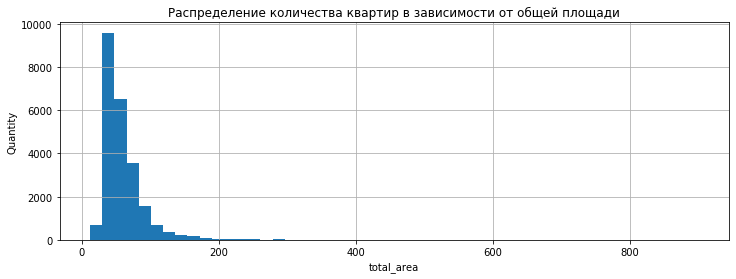

In [383]:
next(drow)

Видим, что основная масса квартир имеет площади да 100м.кв., однако есть квартиры c площадью превышающей 800м. кв.
Выведем статистику по показателю

In [375]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Построим и исследуем гистограмму распределения квартир по цене за метр

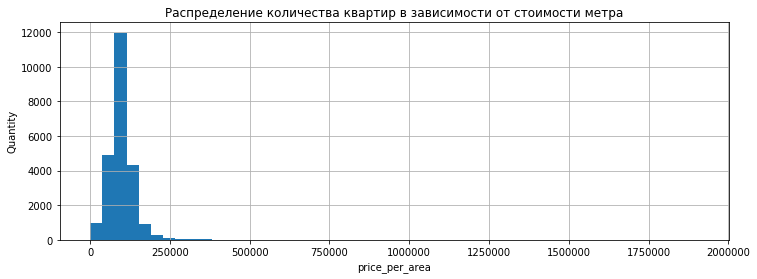

In [376]:
next(drow)

Основная масса квартир имеет стоимость метра в до 115000 за метр. Однако есть и аномальные значения со стоимостью более 1500000 за метр. Выведем статистику по показателю.

In [359]:
df['price_per_area'].describe()

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price_per_area, dtype: float64

Построим и исследуем гистограмму распределения квартир по количеству комнат

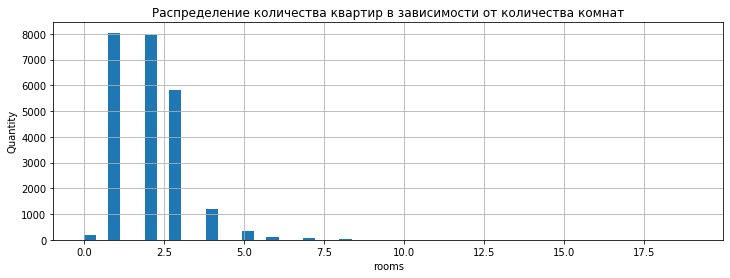

In [377]:
next(drow)

Видим, что основная масса имеет 1-2 комнаты. Некоторые имеет более 15 комнат. Есть также некоторые значения, где 0 комнат - это могут быть квартиры-студии, где ещё нет внутренних стен и пока неизвестно, сколько там будет комнат.

In [360]:
df[df['rooms']==0]['total_area'].sort_values()

8886      15.5
9412      16.0
716       17.0
12996     18.0
8755      18.8
         ...  
13613     58.4
21227     71.0
3458      73.6
20082     98.4
19392    371.0
Name: total_area, Length: 197, dtype: float64

Да, некоторые из них большой площади. Логично, чтов таких квартирах не будет указана площадт кухни. Проверим

In [82]:
df[df['rooms']==0]['kitchen_area'].value_counts()

-1.0    197
Name: kitchen_area, dtype: int64

Действительно. Похоже на правду. -1 мы заменили пропуски в площадях кухни. Вероятно среди них будут записи и о продажи комнат в квартире. Можно исследовать дальше, но это не входит в наши задачи.

Выведем статистику по к-ву комнат

In [361]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Построим и исследуем гистограмму распределения квартир по высоте потолков

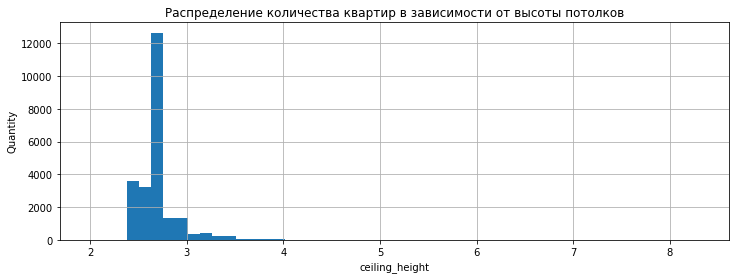

In [378]:
next(drow)

Основная масса имеет потолки от 2.5 до 3 метров. Выведем статистику по параметру. Существенный пик наблюдается при значении 2.65- что соответствует медианному значению, которым заполняли пропуски.

In [85]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.697778
std          0.231910
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

Построим гистограмму и изучим распределения времени продажи квартиры

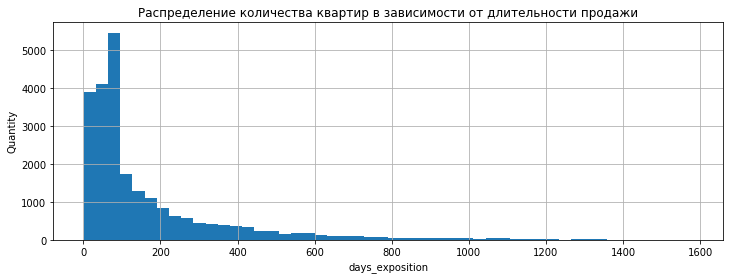

In [379]:
next(drow)

In [364]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Квартиры в среднем продаются за 169 дней и 75 процентов квартир продаётся за срок до 200 дней. Определим,какие квартиры продавались быстрее и медленнее всего. Для этого определим срок, за который продали только 5% всех квартир

In [88]:
df['days_exposition'].quantile(0.05)

10.0

Значит если квартиру продали менее, чем за 10 дней - она попала в эти 5%, что считаем быстрой продажей. Определим, квартиры, которые продавались дольше всего.

In [89]:
df['days_exposition'].quantile(0.95)

603.0

Таким образом, если квартира продавалась более 603 дней, то это необычайно долго. Это считаем долгой продажей.

Для анализа из исходных данных сформируем DataFrame, в котором уберём выбивающиеся значения. Рассмотрим записи, где площадь квартиры менее 200м, цена за квадрат менее 200000, количество комнат не более 10 и есть данные о расстоянии до центра.

In [93]:
good_df=df.loc[(df['total_area']<=200) & 
                (df['price_per_area']<200000) & (df['rooms']<=10) & (df['city_centers_nearest']>0)]

Посмотрим, насколько изменился размер фрейма

In [94]:
len(good_df)

19368

 Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.

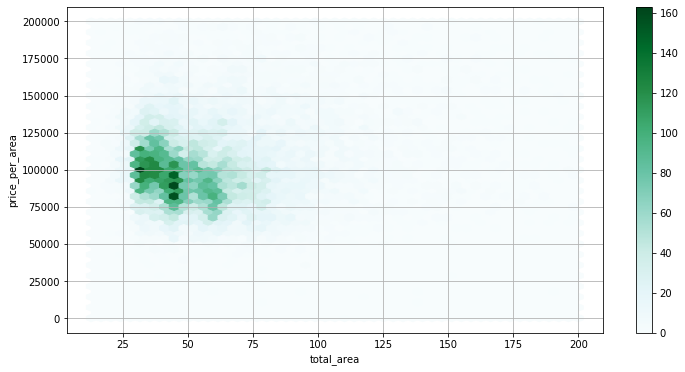

In [92]:
good_df.plot(x='total_area', y='price_per_area', kind='hexbin', gridsize=50, figsize=(12, 6), sharex=False, grid=True)

Из диаграммы видно, что c увеличинием общей площади цена за квадрат незначительно изменяется. Проверим корреляцию.

In [93]:
good_df['total_area'].corr(good_df['price_per_area'])

0.09654260734767936

Корреляция говорит о очень слабой связи параметров.

Посмотрим как влияет к-во комнат на стоимость квадратного метра.

In [94]:
good_df.pivot_table(index='rooms', values='price_per_area', aggfunc=['mean','count'])

,mean,count
,price_per_area,price_per_area
rooms,,
0,111978.255747,172
1,106856.800223,6745
2,102027.831077,6356
3,98082.486339,4801
4,100090.905430,979
5,101159.871604,236
6,98326.910752,57
7,119583.061090,20


Из таблицы видно, что цена квадрата для квартир без планировки, (возможно) комнат и однокомнатных, потом идёт спад при увеличении количества комнат и при количестве комнат больше 4 опять наблюдается рост.

Посмотрим как влияет этаж на цену

In [95]:
good_df.pivot_table(index='res_floor', values='price_per_area', aggfunc=['mean','count'])

,mean,count
,price_per_area,price_per_area
res_floor,,
другой,104821.577147,14824
первый,91737.312420,2142
последний,99541.347612,2402


Видим, что самые дешёвые квартиры на первом этаже, потом на последнем и самые дорогие в колонке другой

Посмотрим, как влияет на стоимость удалённость от центра.

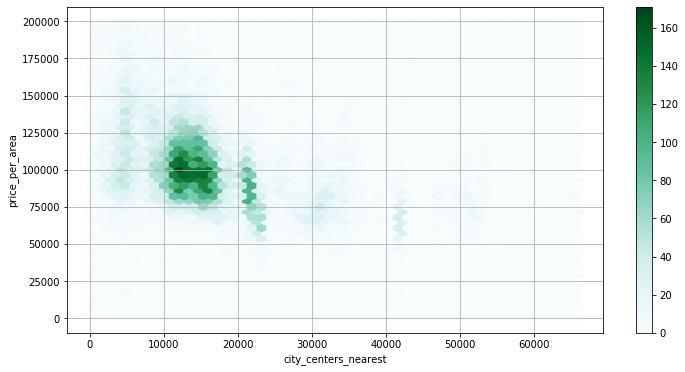

In [96]:
good_df.plot(x='city_centers_nearest', y='price_per_area', kind='hexbin', gridsize=50, figsize=(12, 6), sharex=False, grid=True)

Видим, что с увеличением расстояния цена снижается. Посмотрим корреляцию параметров

In [97]:
good_df['city_centers_nearest'].corr(good_df['price_per_area'])

-0.4553131125274006

Корреляция отражает достаточно существенную отрицательную зависимость.

Посмотрим как зависит стоимость от года размещения

In [98]:
good_df.pivot_table(index='year', values='price_per_area', aggfunc=['mean','count'])

,mean,count
,price_per_area,price_per_area
year,,
2014,116724.128101,111
2015,101175.310681,991
2016,98778.172225,2289
2017,99809.344600,6808
2018,103979.903685,6857
2019,111443.829961,2312


Видно, что наибольшую стоимость имели квартиры, которые выставлялись в 2014 году, хоть их было и немного. Потом с ростом числа квартир цена снижалась до 2016 года, а затем опять несколько повысилась. 

Посмотрим зависимость по месяцам.

In [99]:
good_df.pivot_table(index='month', values='price_per_area', aggfunc=['mean','count'])

,mean,count
,price_per_area,price_per_area
month,,
April,104020.622411,1960
August,103549.700398,1456
December,103637.684866,1284
February,102560.624681,2126
January,103770.952481,1204
July,101873.572549,1403
June,99550.609656,1428
March,103760.874669,2069


Видим, что цена более-менее равномерна по месяцам. Наименьшее значение имеет в мае-июне-июле. Это не самое лучшее время для продажи квартиры. Посмотрим зависимость от дня недели.

In [100]:
good_df.pivot_table(index='week_day', values='price_per_area', aggfunc=['mean','count'])

,mean,count
,price_per_area,price_per_area
week_day,,
Friday,102218.949217,3298
Monday,102808.462665,2953
Saturday,102231.673438,1533
Sunday,102246.140664,1389
Thursday,102903.219141,3480
Tuesday,102802.081903,3472
Wednesday,103296.373510,3243


Видим, что цена практически не зависит от дня недели, однако количество обявлений на выходные меньше, чем в рабочие дни.

Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [101]:
(good_df.pivot_table(index='locality_name', values='price_per_area', aggfunc=['mean','count'])
.sort_values(by=('count', 'price_per_area'), ascending=False).head(10))

,mean,count
,price_per_area,price_per_area
locality_name,,
Санкт-Петербург,108263.747597,15061
Мурино,86087.512050,590
Кудрово,95324.930544,472
Шушары,78677.364217,440
Всеволожск,67214.252635,397
Пушкин,102131.358546,361
Колпино,75333.295801,337
Парголово,90332.263023,326


Больше всего объявлений в Санк-Петербурге и замыкает десятку Петергоф.

Выделим населённые пункты с самой высокой стоимостью жилья.

In [102]:
(good_df.pivot_table(index='locality_name', values='price_per_area', aggfunc=['mean','count'])
.sort_values(by=('mean', 'price_per_area'), ascending=False).head(10))

,mean,count
,price_per_area,price_per_area
locality_name,,
Санкт-Петербург,108263.747597,15061
Репино,104238.614786,4
Пушкин,102131.358546,361
Сестрорецк,101912.339326,182
Лисий Нос,100660.814239,3
Зеленогорск,100636.523580,22
Левашово,96997.690531,1
Кудрово,95324.930544,472


Самая дорогая стоимость квадрата в Санкт-Петербурге, далее идёт Зеленогорск (хоть там и малое число объявлений). Замыкает десятку Паргалово. 

Выделим населённые пункты с самой низкой стоимостью жилья.

In [103]:
(good_df.pivot_table(index='locality_name', values='price_per_area', aggfunc=['mean','count'])
.sort_values(by=('mean', 'price_per_area')).head(10))

,mean,count
,price_per_area,price_per_area
locality_name,,
Щеглово,53133.818808,24
Усть-Ижора,65935.672515,2
Белоостров,66666.666667,1
Всеволожск,67214.252635,397
Сапёрный,67243.016954,6
Гатчина,68746.146763,307
Понтонный,70104.528056,20
Александровская,70262.807084,2


Самая низкая стоимость в Щеглово

### Исследование для квартир в центре

Выделим квартиры в Санкт-Петербурге. Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. 

In [96]:
df['distance']=(df['city_centers_nearest']*0.001).round()

Для тех записей, где не было указано расстояние до центра в графе укажем -1

In [97]:
df.loc[df['city_centers_nearest']==-1,'distance'] = -1

Посмотрим результат

In [98]:
df[['distance','city_centers_nearest']].head()

,distance,city_centers_nearest
0,16.0,16028.0
1,19.0,18603.0
2,14.0,13933.0
3,7.0,6800.0
4,8.0,8098.0


После этого посчитаем среднюю цену для каждого километра и построим график: он должен показывать, как цена зависит от удалённости от центра и определите границу, где график сильно меняется — это и будет центральная зона.

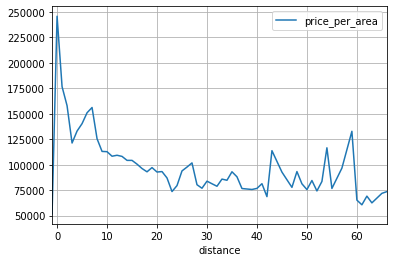

In [99]:
df.pivot_table(index='distance', values='price_per_area').plot(grid=True)

Видим, что цена сильно снижается на расстоянии в 8км. Это условно и определим как центральную зону. 

Выделим сегмент квартир в центре.

In [365]:
center_df=df.loc[(df['distance']<8) & (df['distance']>0)]

Проанализируем эту территорию и изучим площадь.

In [393]:
draw=drow_hist(center_df,hists)

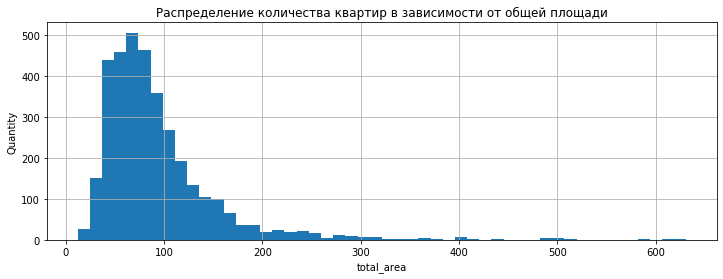

In [394]:
next(draw)

In [397]:
center_df['total_area'].describe()

count    3514.000000
mean       92.945435
std        59.379594
min        12.000000
25%        56.900000
50%        78.400000
75%       110.000000
max       631.200000
Name: total_area, dtype: float64

Основная масса квартир имеет среднее значение показателя 93. Это выше результатов общего исследования.

Исследуем стоимость квадрата в центре

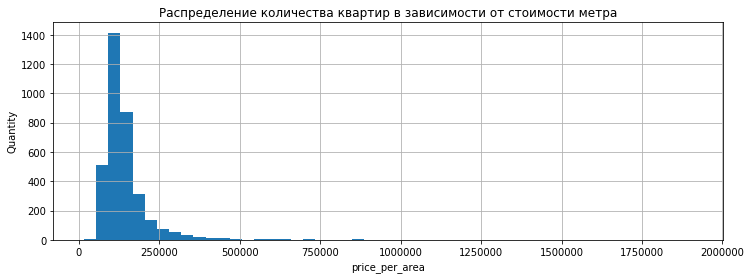

In [398]:
next(draw)

In [399]:
center_df['price_per_area'].describe()

count    3.514000e+03
mean     1.443035e+05
std      9.224731e+04
min      1.534527e+04
25%      9.983923e+04
50%      1.235137e+05
75%      1.551994e+05
max      1.907500e+06
Name: price_per_area, dtype: float64

Средняя стоимость квадрата в центре - 144304. Это выше общего показателя.

Исследуем число комнат в центре

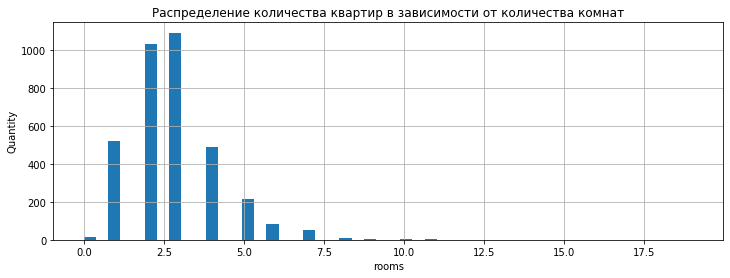

In [400]:
next(draw)

In [401]:
center_df['rooms'].value_counts()

3     1090
2     1028
1      518
4      491
5      213
6       83
7       53
0       17
8       10
9        3
11       2
10       2
19       1
15       1
16       1
14       1
Name: rooms, dtype: int64

Больше всего квартир в центре имеею 2-3 комнаты. Что отличается от результатов общего исследования, где больше квартир с 1-2 комантами.

Посмотрим, какая высота потолков у квартир в центре.

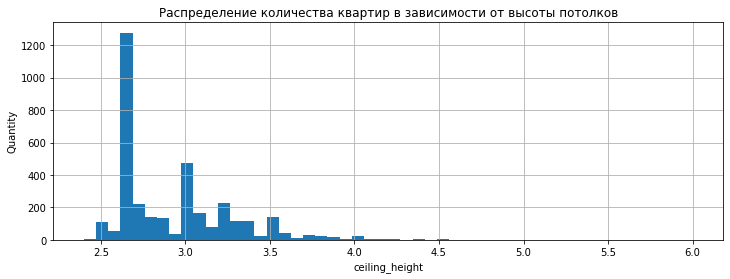

In [402]:
next(draw)

In [403]:
center_df['ceiling_height'].describe()

count    3514.000000
mean        2.936799
std         0.371610
min         2.400000
25%         2.650000
50%         2.800000
75%         3.130000
max         6.000000
Name: ceiling_height, dtype: float64

Cредняя высота почти 3 метра. и у основной массы до 3.5м. В общем исследовании получили среднюю высоту 2.69м.

Посмотрим, как число комнат влияет на стоимость квадратного метра.

In [121]:
center_df.pivot_table(index='rooms', values='price_per_area', aggfunc=['mean','count'])

,mean,count
,price_per_area,price_per_area
rooms,,
0,145109.260527,17
1,153769.846750,518
2,140253.166402,1028
3,143363.172865,1090
4,139857.367746,491
5,145666.958063,213
6,153806.536436,83
7,166814.684887,53


Самые дорогие - однокомнатные.Затем цена снижается с увеличинием комнат, но для 3-х комнатных она выше, чем для 2-х комнатных. Если комнат больше 4-х, то цена снова возрастает. Квартир с числом комнат больше 8 недостаточно, чтобы делать окончательные выводы.

Посмотрим как этажность влияет на стоимость

In [122]:
center_df.pivot_table(index='res_floor', values='price_per_area', aggfunc=['mean','count'])

,mean,count
,price_per_area,price_per_area
res_floor,,
другой,147893.007963,2502
первый,122107.241597,384
последний,143574.699499,628


Самый дешёвый квадрат на первом этаже, затем на последнем и самый дорогой с параметром другой. Аналогично общему исследованию.

Посмотрим как влияет расстояние до центра.

In [123]:
center_df.pivot_table(index='distance', values='price_per_area', aggfunc=['mean','count'])

,mean,count
,price_per_area,price_per_area
distance,,
1.0,176640.649827,193
2.0,157944.348141,311
3.0,121299.669876,352
4.0,133035.838239,696
5.0,140324.467496,924
6.0,151012.193621,618
7.0,156176.879664,420


С увеличением расстояния цена квадрата снижается. Однако после 4-х километров стоимость повышается.

Посмотрим, как влияет год размещения объявления на стоимость квадрата.

In [124]:
center_df.pivot_table(index='year', values='price_per_area', aggfunc=['mean','count'])

,mean,count
,price_per_area,price_per_area
year,,
2014,177416.021863,26
2015,143848.218456,319
2016,145077.724915,500
2017,142348.063790,1252
2018,140439.127304,1038
2019,158436.800163,379


Видно, что наибольшую стоимость имели квартиры, которые выставлялись в 2014 году, хоть их было и немного. Потом цена снижалась до 2018 года, а затем опять несколько повысилась. Несколько отличается от общей тенденции.

Посмотрим зависимость по месяцам.

In [125]:
center_df.pivot_table(index='month', values='price_per_area', aggfunc=['mean','count'])

,mean,count
,price_per_area,price_per_area
month,,
April,153069.051688,333
August,145647.773936,259
December,145336.852940,240
February,143817.859776,386
January,144825.883336,215
July,143258.606504,275
June,144783.013155,289
March,146252.719851,371


Видим, что цена имеет наибольшее значение в апреле, а наименьшее значение имеет в ма и октябре-ноябре. Эти результаты несколько отличаются от результатов, что были получены для всех квартир.

Посмотрим зависимость от дня недели.

In [121]:
center_df.pivot_table(index='week_day', values='price_per_area', aggfunc=['mean','count'])

,mean,count
,price_per_area,price_per_area
week_day,,
Friday,151606.405175,106
Monday,174798.179635,78
Saturday,151368.437336,41
Sunday,167928.998023,29
Thursday,185408.540548,114
Tuesday,188132.857864,75
Wednesday,157076.377394,88


Видим, что количество обявлений на выходные меньше, чем в рабочие дни. 
При этом, квартиры, которые были выставлены на продажу во вторник и четверг имеют большую стоимость квадрата.

### Вывод

В ходе исследователького анализа решались задачи как для всех квартир в таблице, так и для квартир в центре.
- Определили, какая зона входит в условный центр. Приняли, что центральная область - это расстояние меньше 8 км.
- Установили, что для квартир в центральной зоне расстояние до центра влияет сильно на цену. С ростом расстояния цена падает, потом растёт. Для общей совокупности такой зависимости не наблюдалось
- Определили, что общая площадь для квартир в центре больше, чем общая площадь квартир в генеральном исследовании.
- Стоимость квадрата для квартир в центре выше, чем для квартир во всей выборке. 
- Установили, что основная масса квартир в центре имеет 2-3 комнаты, а в общей выборке 1-2.
- Высота потолков в среднем по всем объявлениям составляет 2.69м, а для центра - 2.9м.
- Самые дорогие квартиры в центре - это однокомнатные. Для общей выборки - квартиры со свободной планировкой. С ростом к-ва цена несколько снижается, потом растёт.
- Самые дешёвые квартиры на первом этаже, потом на последнем и самые дорогие в колонке *другой* для обеих выборок.
- Наибольшую стоимость имели квартиры, которые выставлялись в 2014 году, хоть их было и немного. Потом с ростом числа квартир цена снижалась до 2016 года для общей выборки, для квартир в центре снижение было до 2018 года.
- Для квартир в центре цена имеет наибльшее значение в апреле, а наименьшее значение имеет в маеи октябре-ноябре. Эти результаты несколько отличаются от результатов, что были получены для всех квартир. Там стоимосоть более равномерна и миниму достигается в мае-июне-июле.
- Количество обявлений на выходные меньше, чем в рабочие дни. При этом, квартиры, которые были выставлены на продажу во вторник и четверг имеют большую стоимость квадрата для квартир в центре. Для квартир и из общей совокупности имеем более равномерную цену по дням.
- Установили, что больше всего объявлений в Санкт-Петербурге, там же самые дорогие квартира. Самые дешёвые квартиры в Щеглово.
- Установили, что если квартира была продана мене чем за 10 дней, то это довольно быстро, если не продана за 603 - то это очень медленно.

## Общий вывод

В ходе исследования выполнили предобработку данных, где заполнили пропуски и обосновали целесообразность замены. 
Добавили некоторые показатели: цену квадратного метра, отношение жилой площади и площади кухни к общей, месяц, год, день недели публикации объвления, этажность (первый, последний, другой). Выделили центральную зону в Санкт-Петербурге и провели исследование основных влияющих факторов на стоимость квадратного метра для всех объявлений и объявлений в центральной зоне. Некоторые показатели в двух совокупностях имели сходные характеристики (например год пуюликации объявления), некоторые отличались. Определили, что можно считать быстрой продажей, что медленной.